In [27]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [28]:
from Transition import Transition

[[0.3394744  0.00501542 0.65551018]
 [0.18126989 0.60016687 0.21856324]
 [0.78759594 0.16998342 0.04242064]]
[[0.3394744  0.00501542 0.65551018]
 [0.18126989 0.60016687 0.21856324]
 [0.78759594 0.16998342 0.04242064]]


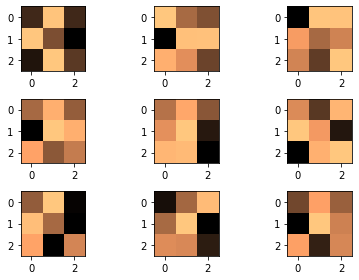

In [29]:
import datetime

Tra = Transition(3,3)

for _ in range(1):
    Tra.gen_state_prob(3, "uniform")
    M = Tra.get_transition_matrix()
    print(M)


print(M)

import numpy as np
from matplotlib import pyplot as plt
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(M, cmap="copper_r")
plt.colorbar(im)
plt.show()
"""
figure, axis = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        Tra.gen_state_prob(3, "uniform")
        M = Tra.get_transition_matrix()
        plt.rcParams["figure.autolayout"] = True
        axis[i,j].imshow(M, cmap="copper_r")
        


#axis[0, 1].plot(X, Y2)
#axis[0, 1].set_title("Cosine Function")
#plt.savefig("plots/TM-heatmap-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show()

## Plot State Transition Diagram

In [30]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

## Simulate Map

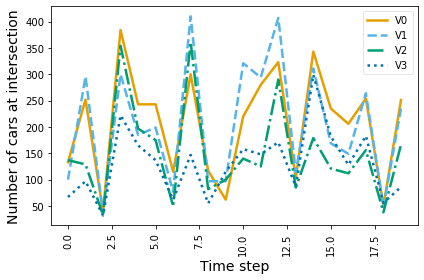

In [31]:
from MarkovProcess import MarkovChain
from Population import Population
from Simulate import Simulate

P = Population(20,0.5,0.5,30)

timeSteps = [10,50,100,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
#timeSteps = [10,100,500,1000,1500,2000,2500,3000,3500,4000]
S = Simulate(timeSteps)

S.addCars = True        #add new cars at every time step
S.addActCars = False
S.runSimulation(P)
#S.printMap(False)
S.plotData()
Features, Labels = S.getLearningData()
#print(Labels)
#print(Features)

S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [32]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [33]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [34]:
from sklearn import tree
X = Features
Y = Labels
pLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    pLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(pLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.31


In [35]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.518421


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Neural Network MLP Classifier

data: 380
labels: 380
[0.06596971159502366, 0.44674084950387155, 0.4872894389011049, 0.3732568064154228, 0.37824778582607005, 0.24849540775850718, 0.7503423862810763, 0.19935720260012513, 0.0503004111187987, 0]
[0.1714744485211307, 0.11629399843057237, 0.7122315530482969, 0.10774079390864627, 0.38063192503181303, 0.5116272810595406, 0.04517507856173935, 0.9523297264900213, 0.0024951949482392493, 1]
[0.7631165502777238, 0.10385603617104606, 0.13302741355123013, 0.0157613537138701, 0.69618660222785, 0.28805204405827994, 0.25538700102753137, 0.4015951172426325, 0.3430178817298361, 0.5]
[0.20746913193750896, 0.7259137205938209, 0.06661714746867002, 0.47343086882181107, 0.44291021845256506, 0.08365891272562395, 0.19207920200363776, 0.5931040102663396, 0.21481678773002252, 1]
[0.12130587125713102, 0.3683820358198255, 0.5103120929230436, 0.14230149585624338, 0.6065490283016608, 0.25114947584209585, 0.48290192536956894, 0.169018040802821, 0.3480800338276101, 1]

right
straight
right
right
stra

c:\Users\aliha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


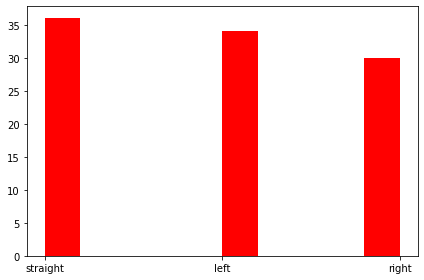

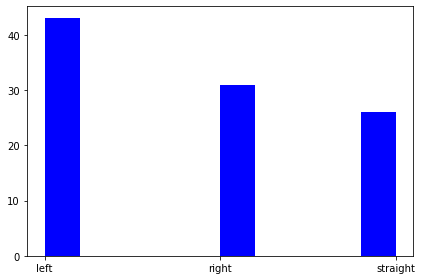

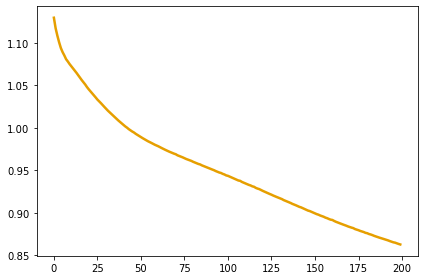

accuracy:  0.52
score: 0.5894736842105263
loss: 0.8627764195380071


In [37]:
from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import StandardScaler 
X = Features
y = Labels
MLPpLabels = []
    

print("data:",len(X))
print("labels:",len(y))

[print(X[i]) for i in range(5)] 
print()
[print(y[i]) for i in range(5)] 

#scaler = StandardScaler()  
#scaler.fit(X)  
#X_train = scaler.transform(X)  
#X_test = scaler.transform(tFeatures)  

clf = MLPClassifier(solver='adam', 
                    alpha=0.00001,
                    #hidden_layer_sizes=(5, 2), 
                    random_state=1,
                    batch_size='auto',
                    early_stopping=False,
                    warm_start=True)

clf.fit(X, y)

matched = 0
lbl = ""
for i in range(len(tFeatures)):
    L = clf.predict([tFeatures[i]])
    if L == tLabels[i]:
        matched+=1
    MLPpLabels.append(L[0])

from matplotlib import pyplot as plt

plt.hist(tLabels, color='r')
#plt.legend()
plt.show()
plt.hist(MLPpLabels, color='b')
plt.show()
#print("tLabels", tLabels)
#print("MLPpLabels", MLPpLabels)

plt.plot(clf.loss_curve_, label="loss")
#plt.plot(clf.best_validation_score_, label="validation")

#plt.legend(True)
plt.show()

print("accuracy: ", matched/len(tFeatures))
print("score:", clf.score(Features, Labels))
print("loss:", clf.loss_)

#clf.predict_proba([[2., 2.], [1., 2.]])

## Confusion Matrix

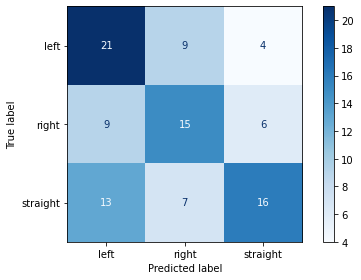

In [38]:
def labelToNum(lbls):
    temp = []
    for i in lbls:
        if i == 'left': temp.append(0)
        elif i == 'straight': temp.append(0.5)
        elif i == 'right' : temp.append(1)
    return temp

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import datetime

actual = tLabels
predicted = pLabels

#confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=clf.classes_)#["left", "straight", "right"])
confusion_matrix = metrics.confusion_matrix(actual, MLPpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])

cm_display.plot(cmap = 'Blues')
#plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show() 

In [39]:
#LATEST 01/19